In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet



In [201]:
data= pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [243]:
mask=dat

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [203]:
data.columns




Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       

'price''bedrooms''bathrooms''sqft_living'

In [204]:
"""
data.rename(columns = {'price': 'price_thousand_dollard', 'sqft_living': 'm2_living',"sqft_lot":"m2_lot","sqft_basement":"m2_basement","sqft_living15":"m2_living15",
"sqft_lot15":"m2_lot15","sqft_above":"m2_above"},inplace = True)
data['price_thousand_dollard']= data['price_thousand_dollard']/1000
data['m2_living']=data['m2_living']* 0.092903
data["m2_lot"]=data["m2_lot"]* 0.092903
data["m2_basement"]=data["m2_basement"]* 0.092903
data["m2_living15"]=data["m2_living15"]* 0.092903
data["m2_lot15"]=data["m2_lot15"]* 0.092903
data["m2_above"] = data["m2_above"] * 0.092903
data
"""

'\ndata.rename(columns = {\'price\': \'price_thousand_dollard\', \'sqft_living\': \'m2_living\',"sqft_lot":"m2_lot","sqft_basement":"m2_basement","sqft_living15":"m2_living15",\n"sqft_lot15":"m2_lot15","sqft_above":"m2_above"},inplace = True)\ndata[\'price_thousand_dollard\']= data[\'price_thousand_dollard\']/1000\ndata[\'m2_living\']=data[\'m2_living\']* 0.092903\ndata["m2_lot"]=data["m2_lot"]* 0.092903\ndata["m2_basement"]=data["m2_basement"]* 0.092903\ndata["m2_living15"]=data["m2_living15"]* 0.092903\ndata["m2_lot15"]=data["m2_lot15"]* 0.092903\ndata["m2_above"] = data["m2_above"] * 0.092903\ndata\n'

In [205]:
data["date"]=pd.to_datetime(data['date'])
data["year"]=data["date"].dt.year

data["month"]=data["date"].dt.month
data[["month","date"]]
data 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [207]:
data["zipcode"] = data["zipcode"].astype(str)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [208]:
df=data.drop(["date"],axis=1)
df.columns


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',

In [209]:
to_keep=["price","bedrooms", "bathrooms", "sqft_living", "sqft_lot","floors", "waterfront", "view", "condition", "grade", "sqft_above","sqft_basement", "yr_built", "yr_renovated", "zipcode", "month"]
df=df[to_keep]

In [210]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'month'],
      dtype='object')

In [211]:
X=df.drop('price',axis=1)
y=df.price


In [212]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [213]:
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)

In [214]:
my_num_pipe = make_pipeline(StandardScaler(),PolynomialFeatures())

In [215]:
cat_col

['zipcode']

In [216]:
preprocessing=ColumnTransformer([("one_hot",OneHotEncoder(),cat_col),("scaling",my_num_pipe,num_col)])

In [217]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

In [218]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())

In [219]:
my_pipe_lasso.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('one_hot', OneHotEncoder(), ['zipcode']),
                                   ('scaling',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['bedrooms', 'bathrooms', 'sqft_living',
                                     'sqft_lot', 'floors', 'waterfront', 'view',
                                     'condition', 'grade', 'sqft_above',
                                     'sqft_basement', 'yr_built', 'yr_renovated',
                                     'month'])])),
  ('lasso', Lasso())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('one_hot', OneHotEncoder(), ['zipcode']),
                          

, Ridge,Lasso,ElasticNet

In [220]:
my_pipe_ridge= make_pipeline(preprocessing, Ridge(alpha=0.1))

In [221]:
my_pipe_elasticnet= make_pipeline(preprocessing, ElasticNet())

In [222]:
my_pipe_lr.fit(X_train, y_train)
my_pipe_lr.score(X_test, y_test)

0.8635013856655274

In [223]:
my_pipe_lasso.fit(X_train, y_train)
my_pipe_lasso.score(X_test, y_test)

/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.358e+14, tolerance: 2.266e+11
  model = cd_fast.enet_coordinate_descent(


0.8631542651620827

In [224]:
my_pipe_ridge.fit(X_train, y_train)
my_pipe_ridge.score(X_test, y_test)

0.8634881395277565

In [225]:
my_pipe_elasticnet.fit(X_train, y_train)
my_pipe_elasticnet.score(X_train, y_train)

0.7075453360276163

In [226]:
y_pred = my_pipe_ridge.predict(X)
residual =(y_pred-y).abs().sort_values()

In [227]:
residual

7158     2.875655e+00
17706    5.138412e+00
17366    9.860492e+00
15346    2.304800e+01
18038    3.315182e+01
             ...     
21050    1.713028e+06
7252     1.796249e+06
9254     1.821535e+06
8638     2.077136e+06
1448     2.102920e+06
Name: price, Length: 21613, dtype: float64

In [228]:
to_drop=residual[residual>600000].index

In [229]:
df[df.index.isin(to_drop)].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,month
count,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,2.332408e+06,4.227941,3.663603,4563.161765,30899.198529,1.830882,0.154412,1.838235,3.323529,10.198529,3676.779412,886.382353,1975.066176,337.573529,6.080882
std,1.242835e+06,0.958138,1.244387,1728.540306,87218.894031,0.487703,0.362679,1.669866,0.631076,1.434082,1374.532134,861.229148,34.934479,751.033122,3.069697
min,1.693170e+05,2.000000,1.000000,790.000000,2415.000000,1.000000,0.000000,0.000000,2.000000,6.000000,790.000000,0.000000,1902.000000,0.000000,1.000000
25%,1.650625e+06,4.000000,2.750000,3427.500000,8460.500000,2.000000,0.000000,0.000000,3.000000,9.000000,2845.000000,0.000000,1950.750000,0.000000,4.000000
50%,2.279000e+06,4.000000,3.500000,4365.000000,13795.000000,2.000000,0.000000,2.000000,3.000000,10.000000,3375.000000,755.000000,1986.000000,0.000000,6.000000
75%,2.900750e+06,5.000000,4.250000,5256.250000,24073.000000,2.000000,0.000000,4.000000,3.250000,11.000000,4400.000000,1437.500000,2006.000000,0.000000,8.250000
max,7.700000e+06,8.000000,8.000000,12050.000000,871200.000000,3.000000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2013.000000,12.000000


In [230]:
to_drop

Int64Index([ 3258, 18685,  3204,  2713,  8222, 19323, 18848,  4859, 13853,
            20369,
            ...
            10446,  4411, 18482, 20154, 12370, 21050,  7252,  9254,  8638,
             1448],
           dtype='int64', length=136)

In [231]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1


In [232]:
df_cleaned=df.drop(to_drop)

In [233]:
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1


/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


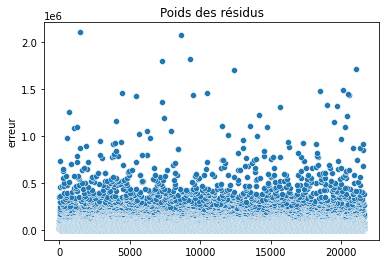

In [234]:
sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [235]:
X = df_cleaned.drop("price", axis=1)
y = df_cleaned.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [236]:
X_test.columns


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'month'],
      dtype='object')

In [237]:
my_pipe_ridge.fit(X_train, y_train)
my_pipe_ridge.score(X_test, y_test)

0.8802497385500522

In [238]:
my_pipe_lr.fit(X_train, y_train)
my_pipe_lr.score(X_test, y_test)


0.8801843232090915

In [239]:
import pickle 
pickle_out = open("my_pipe_ridge.pkl", "wb") 
pickle.dump(my_pipe_ridge, pickle_out) 
pickle_out.close()

In [240]:
N,train_score,val_score =learning_curve(LinearRegression(),X_train,y_train,train_sizes= np.linspace(0.2,1.0,5) ,cv=5)
print(N)

[ 2577  5154  7731 10308 12885]


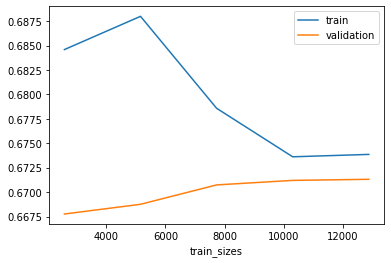

In [241]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel("train_sizes")
plt.legend()